In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
from skimage.io import imread_collection
from skimage import data, img_as_float, io, exposure
import matplotlib
from fastai.vision.all import *

In [2]:
def load_images_from_folder(folder):
    images = []
    count = 0
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder,filename))
        count+=1
        if img is not None:
            images.append(filename)
        if(count>1000):
            break
    return images

In [3]:
pathFolder = "train_v2"
allImages = load_images_from_folder(pathFolder)
print(len(allImages))

1001


In [4]:
imagesDir = 'train_v2/*.jpg'
totalImages = imread_collection(imagesDir)
print(len(totalImages))

192556


In [5]:
processedImages = []

In [6]:
# for i in range(0,len(totalImages)):
for i in range(0,10):
    newImage = exposure.equalize_hist(totalImages[i])
    processedImages.append(newImage)
    # io.imsave("masks/{}".format(allImages[i]), newImage)


c:\users\manav\appdata\local\programs\python\python39\lib\site-packages\skimage\_shared\utils.py:338: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


In [7]:
# --------------------------------------------------------------------------------------

In [8]:
for i in range(0,20):
    msk = PILMask.create(totalImages[i])
    # msk.show()

In [9]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
PATH = './'
TRAIN = './train_v2/'
TEST = './test_v2/'
SEGMENTATION = './train_ship_segmentations_v2.csv'

In [11]:
train_names = [f for f in os.listdir(TRAIN)]
tr_n, val_n = train_test_split(train_names, test_size=0.05, random_state=42)
segmentation_df = pd.read_csv(os.path.join(PATH, SEGMENTATION)).set_index('ImageId')

In [12]:
def cut_empty(names):
    return [name for name in names 
            if(type(segmentation_df.loc[name]['EncodedPixels']) != float)]

tr_n = cut_empty(tr_n)
val_n = cut_empty(val_n)
print(len(tr_n))

40428


In [13]:
print(tr_n[0])
im=PILImage.create("./train_v2/{}".format(tr_n[0]))

49677e036.jpg


768 768


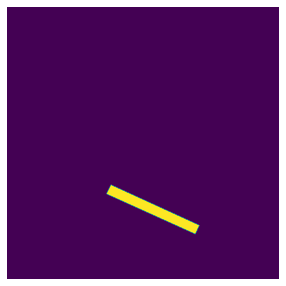

In [32]:
file="00ce2c1c0.jpg"
ar=segmentation_df.loc[file][0].split(" ")
rle=[int(x) for x in ar]
pixel,pixel_count = [],[]
[pixel.append(rle[i]) if i%2==0 else pixel_count.append(rle[i]) for i in range(0, len(rle))]
rle_pixels = [list(range(pixel[i],pixel[i]+pixel_count[i])) for i in range(0, len(pixel))]
rle_mask_pixels = sum(rle_pixels,[]) 
shape=np.array(cv.imread("./train_v2/{}".format(file))).shape
# plt.imshow(cv.imread("./train_v2/{}".format(file)))
mask_img = np.zeros((shape[0]*shape[1],1), dtype=int)
mask_img[rle_mask_pixels] = 255
l,b=cv.imread("./train_v2/{}".format(file)).shape[0], cv.imread("./train_v2/{}".format(file)).shape[1]
print(l,b)
mask = np.reshape(mask_img, (b, l)).T
msk = PILImage.create(mask)
# plt.imshow(mask)
msk.show()
newSize=(128,128)
msk1=msk.resize(newSize)
# msk1.show()

In [15]:
# msk = PILMask.create(np.array(l,dtype=np.uint8))
# msk.show()

In [16]:
def get_mask(img_id, df):
    shape = (768,768)
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    masks = df.loc[img_id]['EncodedPixels']
    if(type(masks) == float): return img.reshape(shape)
    if(type(masks) == str): masks = [masks]
    for mask in masks:
        s = mask.split()
        for i in range(len(s)//2):
            start = int(s[2*i]) - 1
            length = int(s[2*i+1])
            img[start:start+length] = 1
    return img.reshape(shape).T

In [17]:
# t=get_mask('49677e036.jpg',segmentation_df)
# t

In [18]:
# img = Image.fromarray(np.array(l)).resize((768, 768)).convert('RGB')
# temp =  np.array(img).astype(np.uint8)
# msk = PILMask.create(temp)
# msk.show()